In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer



In [2]:
df = pd.read_csv('housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

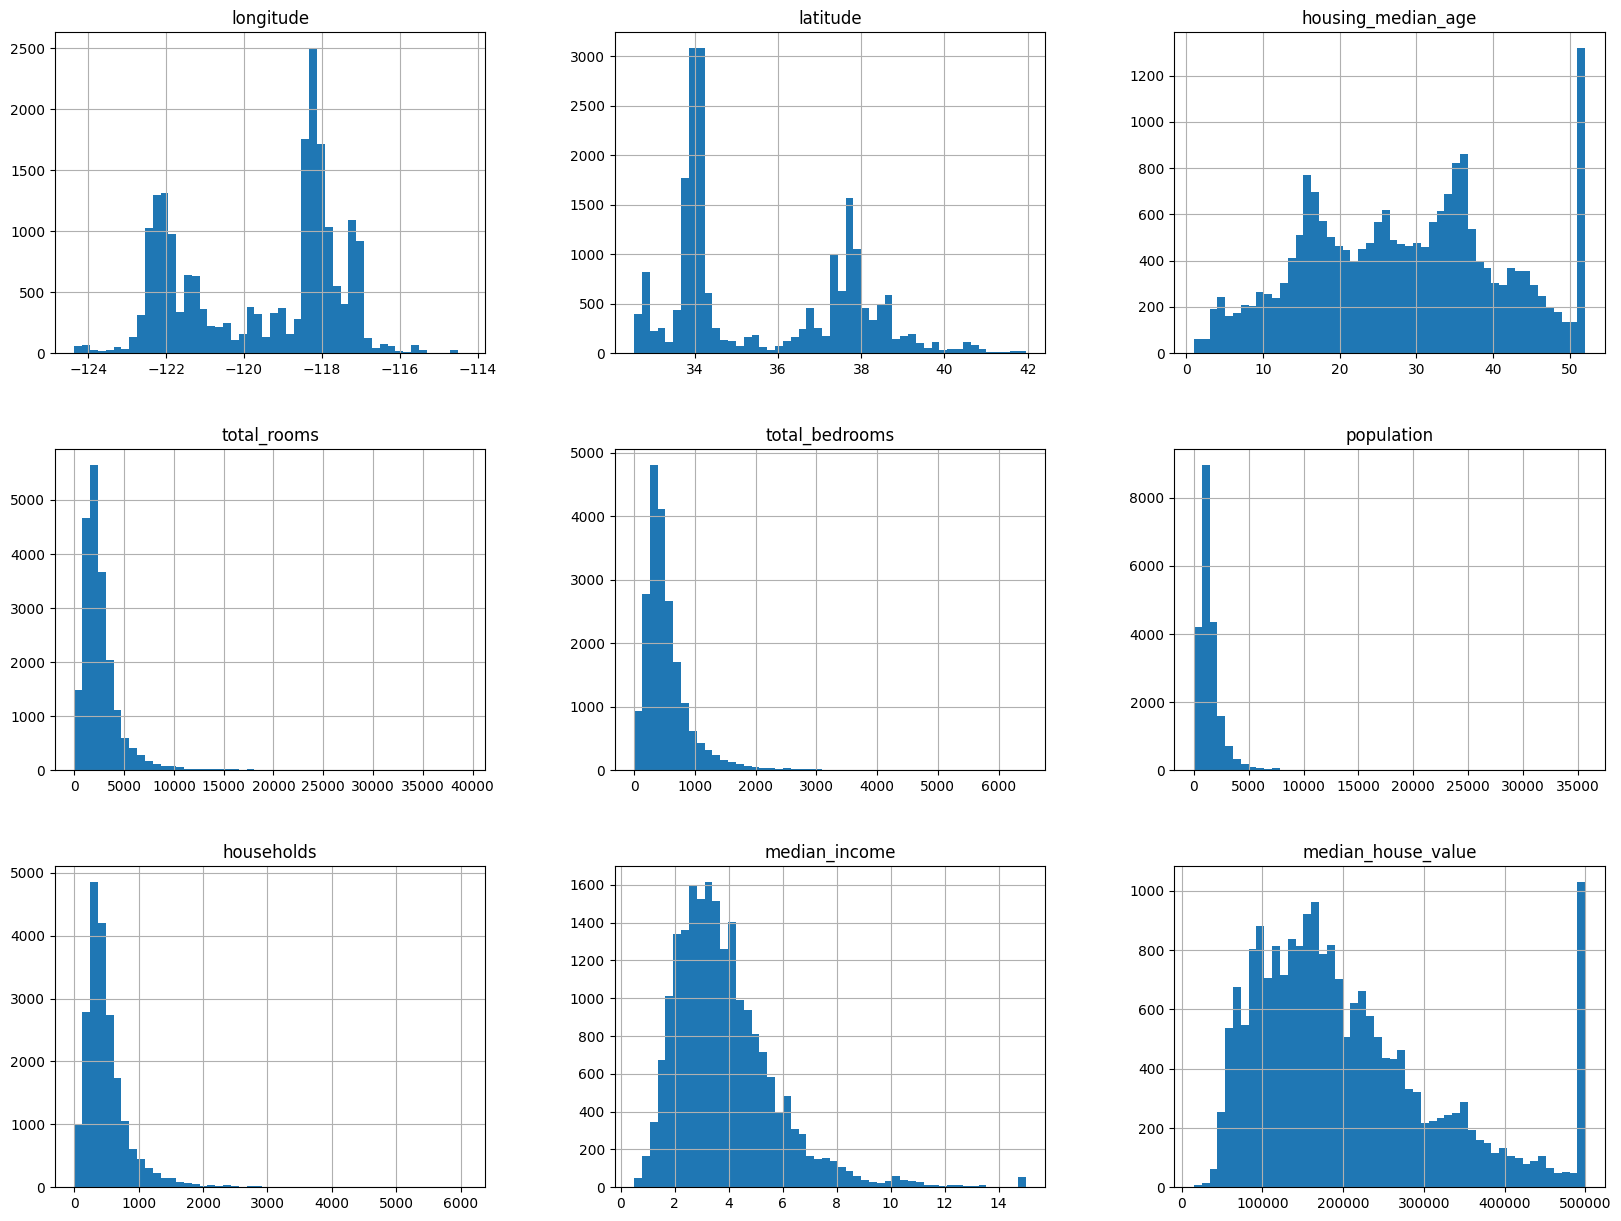

In [6]:
df.hist(bins=50, figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

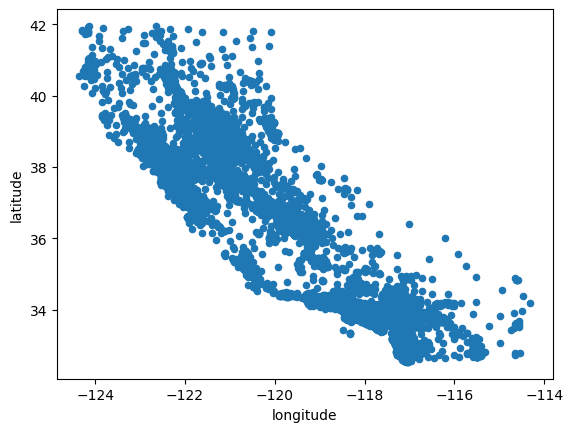

In [7]:
df.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

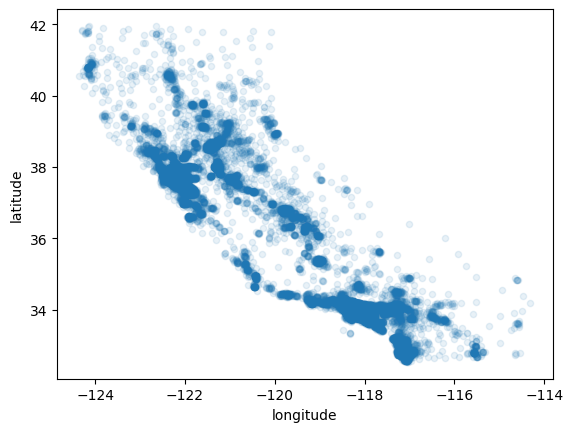

In [8]:
# Rendre compte de la densité de points
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

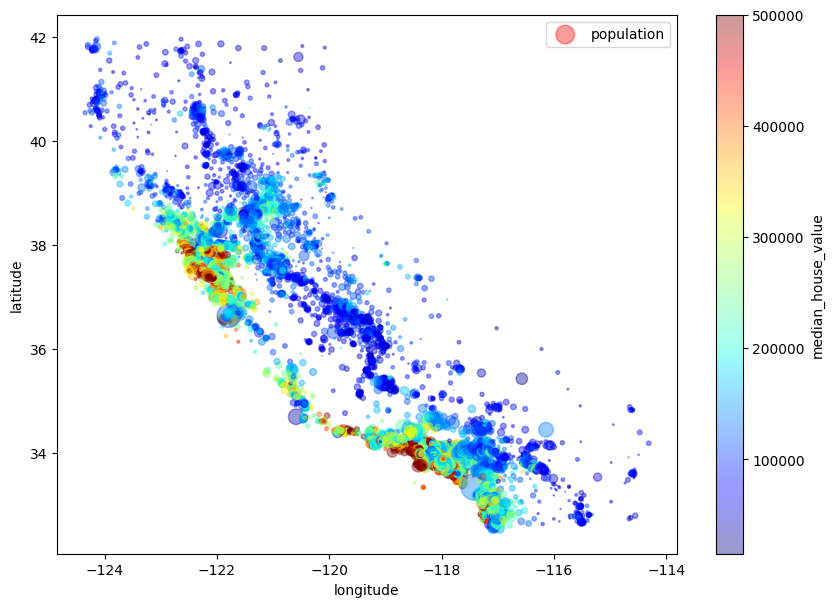

In [9]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=df["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

<Axes: xlabel='median_income', ylabel='median_house_value'>

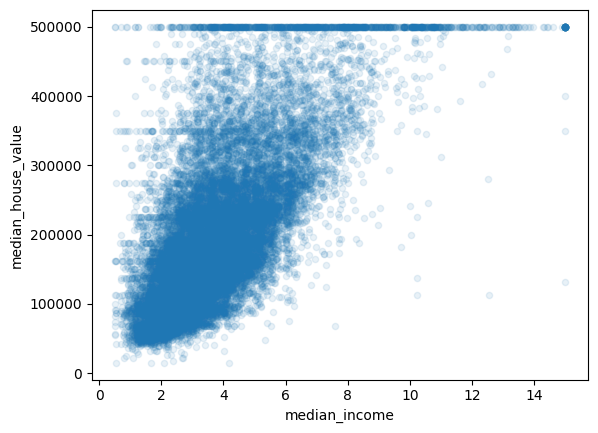

In [10]:
# Tracer median income en fonction de median house value
# On voit la borne supérieure et une forte corrélation (nuage non aléatoirement dispersé)
# D'autres traits horizontaux sont moins évidents
df.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [11]:
housing_num = df.drop("ocean_proximity", axis=1) # Drop de la variable catégorielle pour l'instant
corr_matrix = housing_num.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


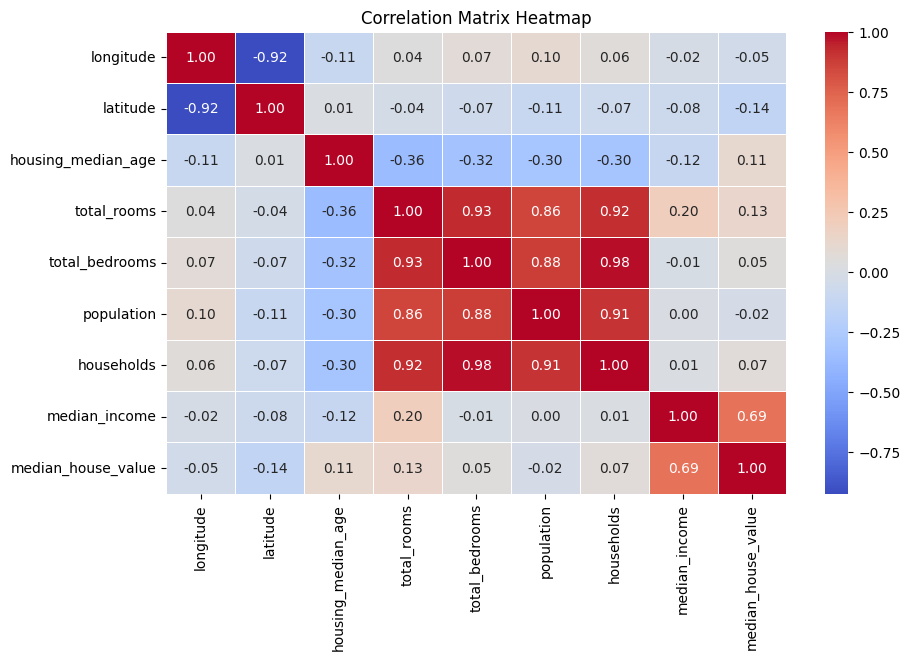

In [12]:

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            annot=True,       # show correlation values
            cmap='coolwarm',  # color palette
            linewidths=0.5,   # lines between cells
            fmt=".2f")        # format numbers

plt.title("Correlation Matrix Heatmap")
plt.show()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3364     -120.51     40.41                36.0         36.0             8.0   
13034    -121.15     38.69                52.0        240.0            44.0   
16669    -120.70     35.32                46.0        118.0            17.0   
19006    -121.98     38.32                45.0         19.0             5.0   

       population  households  median_income  median_house_value  \
3364       4198.0         7.0         5.5179             67500.0   
13034      6675.0        29.0         6.1359            225000.0   
16669      6532.0        13.0         4.2639            350000.0   
19006      7460.0         6.0        10.2264            137500.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
3364           INLAND             5.142857           0.222222   
13034          INLAND             8.275862           0.183333   
16669      NEAR OCEAN             9.076923           0.144068   
190

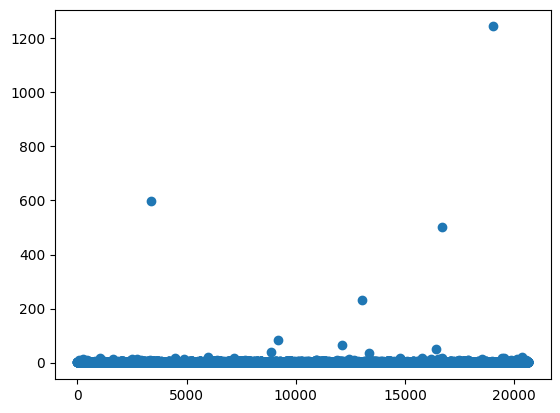

In [13]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
plt.scatter(df.index, df["population_per_household"])

# Certaines valeurs avec beaucoup de population / household : 
print(df[df["population_per_household"] > 100])

# Données aberrantes ?

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


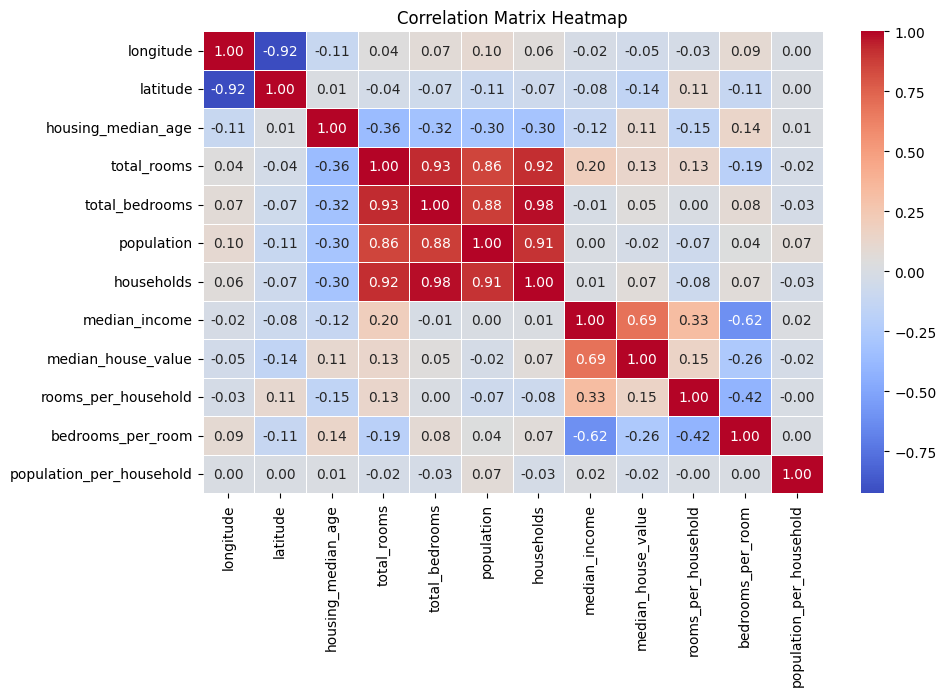

In [14]:
housing_num = df.drop("ocean_proximity", axis=1) # Drop de la variable catégorielle pour l'instant
corr_matrix = housing_num.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            annot=True,       # show correlation values
            cmap='coolwarm',  # color palette
            linewidths=0.5,   # lines between cells
            fmt=".2f")        # format numbers

plt.title("Correlation Matrix Heatmap")
plt.show()

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64


<Axes: >

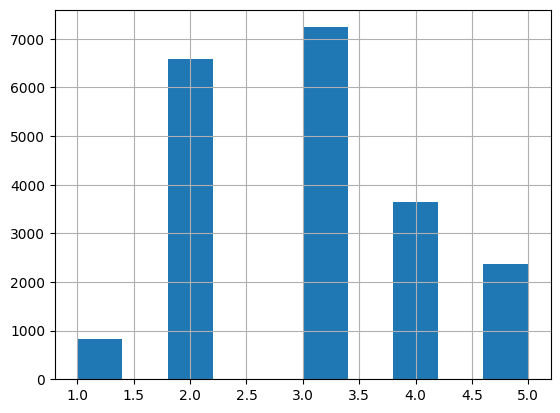

In [15]:
# On rajoute une colonne "income_cat" qui est la colonne median_income stratifiée
df["income_cat"] = pd.cut(df["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])
print(df["income_cat"].value_counts() / len(df))
df["income_cat"].hist()

In [16]:
# Set de train et de test

In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]): # split stratifié sur income_cat
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [18]:
# On vérifie que les proportions sont respectées
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [19]:
# On enlève la colonne qui n'a servi que pour le split : 
strat_test_set.drop("income_cat", axis=1, inplace=True)
strat_train_set.drop("income_cat", axis=1, inplace=True)

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1)
labels = strat_train_set["median_house_value"].copy()

In [21]:
# Instanciation d'un simpleImputer pour la médiance :

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

# On compare les poids calculés par l'imputer avec les valeurs de la médiane
print(imputer.statistics_)
print(housing_num.median().values)



[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  5.23234164e+00  2.03027043e-01  2.81766108e+00]
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  5.23234164e+00  2.03027043e-01  2.81766108e+00]


In [22]:
# On utilise l'imputer qu'on a fit pour transformer les données :
# Le "transform" d'un simpleImputer est le fill des NA
X = imputer.transform(housing_num)

# Reconversion en DF : 
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# On met à jour les colonnes déduites :
housing_tr["rooms_per_household"] = housing_tr["total_rooms"]/housing_tr["households"]
housing_tr["bedrooms_per_room"] = housing_tr["total_bedrooms"]/housing_tr["total_rooms"]
housing_tr["population_per_household"]=housing_tr["population"]/housing_tr["households"]



In [23]:
# Ordinal enconding of ocean_proximity
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
print(housing_cat_encoded[:10])
print(ordinal_encoder.categories_) # Affiche les catégories dans l'ordre des indices associés

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [24]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])
print(housing_cat_1hot.toarray())
print(cat_encoder.categories_)

# Conversion en Dataframe :
housing_cat_1hot = pd.DataFrame(
    housing_cat_1hot.toarray(),
    columns=cat_encoder.categories_
)
print(housing_cat_1hot)
print(housing_cat_1hot.isna())

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
      <1H OCEAN INLAND ISLAND NEAR BAY NEAR OCEAN
0           0.0    1.0    0.0      0.0        0.0
1           0.0    0.0    0.0      0.0        1.0
2           0.0    1.0    0.0      0.0        0.0
3           0.0    0.0    0.0      0.0        1.0
4           1.0    0.0    0.0      0.0        0.0
...         ...    ...    ...      ...        ...
16507       1.0    0.0    0.0      0.0        0.0
16508       0.0    1.0    0.0      0.0        0.0
16509       1.0    0.0    0.0      0.0        0.0
16510       1.0    0.0    0.0      0.0        0.0
16511       0.0    1.0    0.0      0.0        0.0

[16512 rows x 5 columns]
      <1H OCEAN INLAND ISLAND NEAR BAY NEAR OCEAN
0         False  False  False    False      False
1         False  False  False    False      False
2         False  Fals

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'rooms_per_household'}>],
       [<Axes: title={'center': 'bedrooms_per_room'}>,
        <Axes: title={'center': 'population_per_household'}>, <Axes: >]],
      dtype=object)

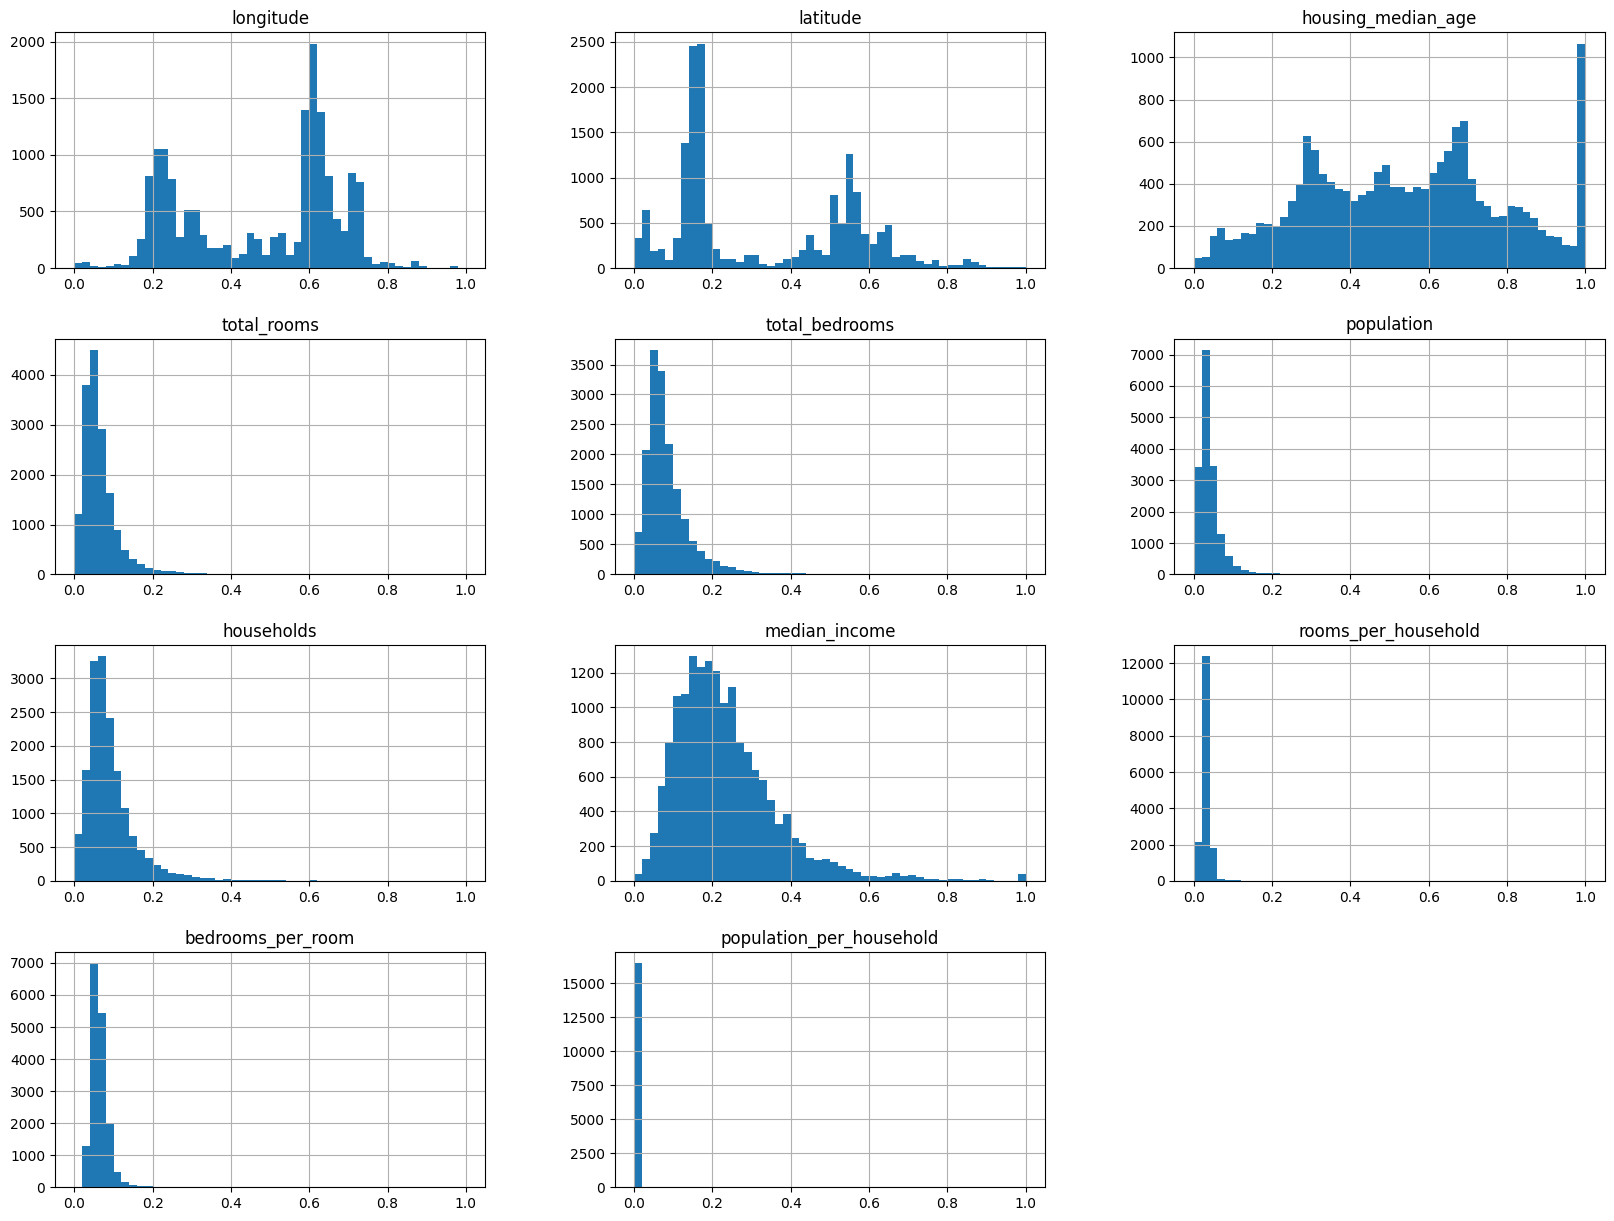

In [25]:
scaler = MinMaxScaler()
housing_tr_scaled = scaler.fit_transform(housing_tr)
housing_tr_scaled = pd.DataFrame(housing_tr_scaled, columns=housing_tr.columns, index=housing_tr.index)
housing_tr_scaled.hist(bins=50, figsize=(20,15))
# Une seule barre pour population_per_household car c'est un nombre compris entre 0 et 4

In [26]:
housing = pd.concat(
    [housing_tr_scaled.reset_index(drop=True),
     housing_cat_1hot.reset_index(drop=True)],
    axis=1
)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19843 entries, 12655 to 16498
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16512 non-null  float64
 10  population_per_household  16512 non-null  float64
 11  (<1H OCEAN,)              16512 non-null  float64
 12  (INLAND,)                 16512 non-null  float64
 13  (ISLAND,)                 16512 non-null  float64
 14  (NEAR B

In [27]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean       0.475534      0.329364            0.542224      0.066555   
std        0.199385      0.227201            0.246565      0.054393   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.253984      0.148778            0.333333      0.036552   
50%        0.581673      0.182784            0.549020      0.053747   
75%        0.631474      0.550478            0.705882      0.079743   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income  \
count    16512.000000  16512.000000  16512.000000   16512.000000   
mean         0.085686      0.039706      0.092422       0.232823   
std          0.066174      0.031269      0.070145       0.131373   
min          0.000000      0.000000      0.000000       0.000000   
25%          0.047358      0.021890      0.051718       0.142553   
50%          0.069427      0.032540      0.075803       0.209766   
75%          0.102932      0.048096      0.112024       0.292784   
max          1.000000      1.000000      1.000000       1.000000   

       rooms_per_household  bedrooms_per_room  population_per_household  \
count         16512.000000       16512.000000              16512.000000   
mean              0.030615           0.063689                  0.001935   
std               0.018552           0.023550                  0.009323   
min               0.000000           0.000000                  0.000000   
25%               0.023524           0.049762                  0.001399   
50%               0.029137           0.059850                  0.001710   
75%               0.034991           0.073214                  0.002084   
max               1.000000           1.000000                  1.000000   

       (<1H OCEAN,)     (INLAND,)     (ISLAND,)   (NEAR BAY,)  (NEAR OCEAN,)  
count  16512.000000  16512.000000  16512.000000  16512.000000   16512.000000  
mean       0.440710      0.318677      0.000121      0.111858       0.128634  
std        0.496487      0.465978      0.011005      0.315201       0.334804  
min        0.000000      0.000000      0.000000      0.000000       0.000000  
25%        0.000000      0.000000      0.000000      0.000000       0.000000  
50%        0.000000      0.000000      0.000000      0.000000       0.000000  
75%        1.000000      1.000000      0.000000      0.000000       0.000000  
max        1.000000      1.000000      1.000000      1.000000       1.000000

In [28]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655   0.287849  0.635494            0.549020     0.098362        0.128061   
15502   0.709163  0.058448            0.117647     0.135168        0.137403   
2908    0.528884  0.300744            0.843137     0.041003        0.049613   
14053   0.719124  0.022317            0.450980     0.047591        0.083280   
20496   0.562749  0.184910            0.509804     0.089790        0.103737   

       population  households  median_income  rooms_per_household  \
12655    0.062614    0.131441       0.115426             0.030938   
15502    0.056392    0.143017       0.402574             0.041176   
2908     0.018610    0.055639       0.163798             0.030281   
14053    0.025085    0.089806       0.119067             0.019575   
20496    0.051403    0.107916       0.275617             0.035276   

       bedrooms_per_room  population_per_household  (<1H OCEAN,)  (INLAND,)  \
12655           0.060836                  0.001993           0.0        0.0   
15502           0.044594                  0.001554           1.0        0.0   
2908            0.055723                  0.001232           1.0        0.0   
14053           0.086324                  0.000939           0.0        1.0   
20496           0.052514                  0.001992           NaN        NaN   

       (ISLAND,)  (NEAR BAY,)  (NEAR OCEAN,)  
12655        0.0          1.0            0.0  
15502        0.0          0.0            0.0  
2908         0.0          0.0            0.0  
14053        0.0          0.0            0.0  
20496        NaN          NaN            NaN

In [29]:
housing.to_csv("treated_housing.csv", index=False)